In [ ]:
"""
Skinlytics Project - Part I

Goal: Create a visualization based on ingredient list profile of a product 


Data we need:
- Product name, product type and Brand

- Ingredient List vectorized and ranked by order 

- Ingredient Classification and score (number of ingredients in a Active group, weighted by the order where they appearon the list)

- Visualize the strenght profile 

"""


In [1]:
# Packages 

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
from math import pi
import re

# Sample Exercise with One Product 

In [43]:
# Step 1: Collect and vectorize the ingredient List

df_prod = [['Moisturizer', 'Neutrogena', 'Neutrogena Hydroboost Body Lotion Gel (EU Formula)', 'Aqua, Glycerin, Isopropyl Palmitate, Petrolatum, Cetyl Alcohol, Dimethicone, Sodium Hyaluronate, Ethylhexylglycerin, Caprylyl Glycol, Cetearyl Olivate, Sorbitan Olivate, Carbomer, Sodium Polyacrylate, Sodium Hydroxide, Tocopherol, Phenoxyethanol, Parfum, CI 42090' ]] 
df_prod = pd.DataFrame(df_prod, columns = ["Product_type", "Brand", "Product_Name", "ingredient_list"])
df_prod.head()


,Product_type,Brand,Product_Name,ingredient_list
0,Moisturizer,Neutrogena,Neutrogena Hydroboost Body Lotion Gel (EU Form...,"Aqua, Glycerin, Isopropyl Palmitate, Petrolatu..."


In [47]:

#ingredient_score

ing = df_prod['ingredient_list'].str.split(',', expand =True)
df_prod = pd.concat([df_prod, ing],axis=1)
df_prod.head()
 
    

,Product_type,Brand,Product_Name,ingredient_list,0,1,2,3,4,5,...,8,9,10,11,12,13,14,15,16,17
0,Moisturizer,Neutrogena,Neutrogena Hydroboost Body Lotion Gel (EU Form...,"Aqua, Glycerin, Isopropyl Palmitate, Petrolatu...",Aqua,Glycerin,Isopropyl Palmitate,Petrolatum,Cetyl Alcohol,Dimethicone,...,Caprylyl Glycol,Cetearyl Olivate,Sorbitan Olivate,Carbomer,Sodium Polyacrylate,Sodium Hydroxide,Tocopherol,Phenoxyethanol,Parfum,CI 42090


In [54]:
df_prod.reset_index(inplace=True)
pd.melt(df_prod, id_vars = ['Product_Name'], value_vars=df_prod.iloc[:,5:22]).drop_duplicates()

,Product_Name,variable,value
0,Neutrogena Hydroboost Body Lotion Gel (EU Form...,ingredient_list,"Aqua, Glycerin, Isopropyl Palmitate, Petrolatu..."
1,Neutrogena Hydroboost Body Lotion Gel (EU Form...,0,Aqua
3,Neutrogena Hydroboost Body Lotion Gel (EU Form...,1,Glycerin
5,Neutrogena Hydroboost Body Lotion Gel (EU Form...,2,Isopropyl Palmitate
7,Neutrogena Hydroboost Body Lotion Gel (EU Form...,3,Petrolatum
9,Neutrogena Hydroboost Body Lotion Gel (EU Form...,4,Cetyl Alcohol
11,Neutrogena Hydroboost Body Lotion Gel (EU Form...,5,Dimethicone
13,Neutrogena Hydroboost Body Lotion Gel (EU Form...,6,Sodium Hyaluronate
15,Neutrogena Hydroboost Body Lotion Gel (EU Form...,7,Ethylhexylglycerin
17,Neutrogena Hydroboost Body Lotion Gel (EU Form...,8,Caprylyl Glycol


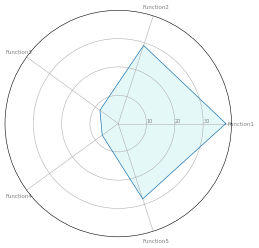

In [53]:
# Step 3: Visualize the data 

# Set data
df = pd.DataFrame({
'group': ['Product1','Product2','Product3','Product4'],
'Function1': [38, 1.5, 30, 4],
'Function2': [29, 10, 9, 34],
'Function3': [8, 39, 23, 24],
'Function4': [7, 31, 33, 14],
'Function5': [28, 15, 32, 14]
})
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

figure(figsize=(8, 6), dpi=50)
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'c', alpha=0.1)

# Show the graph
plt.show()


In [10]:
df.head()

,group,var1,var2,var3,var4,var5
0,A,38.0,29,8,7,28
1,B,1.5,10,39,31,15
2,C,30.0,9,23,33,32
3,D,4.0,34,24,14,14


# SPF Ingredient Profile (50 Products)

In [68]:
 spf = pd.read_csv('Skinlytics - table content  - Ingredient.csv')
spf.head()


,Category,Market,Brand,Product,Ingredient List
0,SPF,AU,BondiSands,Fragrance Free Body lotion SPF 50,"Homosalate (10.00%), Octocrylene (8.00%), Octy..."
1,SPF,DE,DM,Sun Dance Ultra sensitive Gel creme SPF 50,"Aqua, Alcohol Denat., Dibutyl Adipate, Diethyl..."
2,SPF,DE,DM,Balea Niacinamide 10% moisturizer SPF 30,"AQUA, NIACINAMIDE, DIBUTYL ADIPATE, GLYCERIN, ..."
3,SPF,DE,DM,Alverde Clear Beauty Getonte tagescreme,"Aqua, Olea Europaea Fruit Oil*, CI 77891, Alco..."
4,SPF,DE,Eucerin,Sun Oil Control,"Aqua, Homosalate, Polymethylsilsesquioxane, Bu..."


## Dataset Cleaning

In [90]:
spf.rename(columns={'Ingredient List ':'ingredient_list'},inplace=True)
spf['ingredient_list'] = spf['ingredient_list'].str.lower()
spf['ingredient_list'] = spf['ingredient_list'].str.replace('|',',', regex=False)
spf['ingredient_list'] = spf['ingredient_list'].str.replace('*',' ', regex=False)
spf['ingredient_list'] = spf['ingredient_list'].str.replace('%',' ', regex=False)
spf['ingredient_list'] = spf['ingredient_list'].str.replace('\n',' ', regex=False)
spf['ingredient_list'] = spf['ingredient_list'].str.replace('\u200b',' ',regex=False)
spf['ingredient_list'] = spf['ingredient_list'].str.replace(' ','', regex=False)
spf['ingredient_list'] = spf['ingredient_list'].str.replace('\(\d\.\d\d\)|\(\d\d\.\d\d\)','', regex=True)



spf['cleaned_list'] = spf['ingredient_list']
spf.head()

,Category,Market,Brand,Product,ingredient_list,cleaned_list
0,SPF,AU,BondiSands,Fragrance Free Body lotion SPF 50,"homosalate,octocrylene,octylsalicylate,butylme...","homosalate,octocrylene,octylsalicylate,butylme..."
1,SPF,DE,DM,Sun Dance Ultra sensitive Gel creme SPF 50,"aqua,alcoholdenat.,dibutyladipate,diethylamino...","aqua,alcoholdenat.,dibutyladipate,diethylamino..."
2,SPF,DE,DM,Balea Niacinamide 10% moisturizer SPF 30,"aqua,niacinamide,dibutyladipate,glycerin,ethyl...","aqua,niacinamide,dibutyladipate,glycerin,ethyl..."
3,SPF,DE,DM,Alverde Clear Beauty Getonte tagescreme,"aqua,oleaeuropaeafruitoil,ci77891,alcoholdenat...","aqua,oleaeuropaeafruitoil,ci77891,alcoholdenat..."
4,SPF,DE,Eucerin,Sun Oil Control,"aqua,homosalate,polymethylsilsesquioxane,butyl...","aqua,homosalate,polymethylsilsesquioxane,butyl..."


In [91]:
all_ingreds = []

for i in spf['ingredient_list']:
    ingreds_list = i.split(',')
    for j in ingreds_list:
        all_ingreds.append(j)
        
all_ingreds = sorted(set(all_ingreds))
all_ingreds[0:600]



['(acrylicacid/alkylacrylate(c10-30))copolymer',
 '(acrylicacidna/acryloyldimethyltaurinena)copolymer',
 '1',
 '1-methylhydantoin-2-imide',
 '2-hexanediol',
 '2naphosphate',
 '4-methylbenzylidenecamphor',
 '4-t-butylcyclohexanol',
 'acaciasenegalgum',
 'acidgliciretinic',
 'acrylates-c10-30-alkyl-acrylate-crosspolymer',
 'acrylates/alkylacrylatec10-30crosspolymer',
 'acrylates/c10-30alkylacrylatecrosspolymer',
 'acrylates/dimethiconecopolymer',
 'acrylatescopolymer',
 'adenosine',
 'alcohol',
 'alcoholdenat',
 'alcoholdenat.',
 'alhydroxide',
 'allantoin',
 'aloearborescensleafextract',
 'aloebarbadensisleafextract',
 'aloebarbadensisleafjuicepowder',
 'aloeveraleafextract',
 'alpha-glucan',
 'alpha-isomethylionone',
 'alumina',
 'aluminumhydroxide',
 'aluminumstarchoctenylsuccinate',
 'ammoniumacrylatescopolymer',
 'ammoniumacryloyldimethyltaurate/vpcopolymer',
 'ammoniumpolyacryloyldimethyltaurate',
 'aqua',
 'aqua(water)',
 'aqua/water',
 'arachidylalcohol',
 'arachidylglucoside',
 

In [92]:
len(all_ingreds)

542

## Ingredient list cleaning


In [93]:
cleaned_list = []

for i in spf['cleaned_list']:
    ingreds_c_list = i.split(',')
    for j in ingreds_c_list:
        cleaned_list.append(j)
            
    cleaned_list = sorted(set(cleaned_list))


In [94]:
len(cleaned_list)

542

#### Clean up active ingredients and SPF filters

In [95]:
# Styrene/Acrylates Copolymer 
spf['cleaned_list'] = spf['cleaned_list'].str.replace('styrene\/acrylatescopolymer', 'styrene_acrylates_copolymer', regex=True)

#Zinc Oxide
spf['cleaned_list'] = spf['cleaned_list'].str.replace('microparticlezincoxide|zincoxide\(\d\)|zincoxide\(\d\.\d\)', 'zincoxide', regex=True)



In [96]:
cleaned_list = []

for i in spf['cleaned_list']:
    ingreds_c_list = i.split(',')
    for j in ingreds_c_list:
        cleaned_list.append(j)
            
    cleaned_list = sorted(set(cleaned_list))


In [97]:
len(cleaned_list)

539

#### Remove unecessary ingredients 

In [106]:
# Remove unecessary ingredients 

ingred_to_be_removed = ['1', 
                        '1-methylhydantoin-2-imide', 
                        '-methylhydantoin-2-imide',
                        '2-hexanediol',
                        '2naphosphate', 
                        'acaciasenegalgum', 
                        'acidgliciretinic', 
                        'alhydroxide', 
                        'alpha-isomethylionone', 
                        'alumina',
                        'aluminumstarchoctenylsuccinate',
                        'zeamaysstarch',
                        'xanthangum',
                        'undecane',
                        'tromethamine',
                        'trisodiumethylenediaminedisuccinate',
                        'trisodiumedta' ,
                        'vp/hexadecenecopolymer',
                        'vp/hexadecenecopolymer',
                        'vinyldimethicone/methiconesilsesquioxanecrosspolymer',
                        'triethylhexanoin',
                        'triethoxysilylethylpolydimethylsiloxyethylhexyldimethicone', 
                        'triethoxycaprylylsilane',
                        'triethanolamine',
                        'trideceth-6',
                        'tridecane',
                        'tricaprylin', 
                        'triacontanylpvp', 
                        'tinoxide',
                        'tetrasodiumedta', 
                        'tea-cocoylglutamate',
                        'tapiocastarch',
                        't-butylalcohol',
                        'syntheticfluorphlogopite',
                        '(acrylicacid/alkylacrylate(c10-30))copolymer',
                        '(acrylicacidna/acryloyldimethyltaurinena)copolymer',
                        'acrylates-c10-30-alkyl-acrylate-crosspolymer',
                        'acrylates/alkylacrylatec10-30crosspolymer',
                        'acrylates/c10-30alkylacrylatecrosspolymer',
                        'ammoniumacrylatescopolymer',
                        'ammoniumacryloyldimethyltaurate/vpcopolymer',
                        'ammoniumpolyacryloyldimethyltaurate',
                        'c10-30alkylacrylatecrosspolymer',
                        'c12-22alkylacrylate/hydroxyethylacrylatecopolymer',
                        'dimethiconecrosspolymer(laurylmethacrylate/namethacrylate)',
                        'ethylene/acrylicacidcopolymer',
                        'glycoldimethacrylatecrosspolymer',
                        'hydroxyethylacrylate/sodiumacryloyldimethyltauratecopolymer',
                        'methylmethacrylatecrosspolymer',
                        'polyacrylamide',
                        'polyacrylatecrosspolymer-6',
                        'polyc10-30alkylacrylate',
                        'polymethylmethacrylate',
                        'sodiumacrylate/sodiumacryloyldimethyltauratecopolymer',
                        'sodiumacrylatescopolymer',
                        'sodiumacrylatescrosspolymer-2',
                        'sodiumpolyacrylate',
                        'sodiumpolyacrylatestarch',
                        'sodiumpolyacryloyldimethyltaurate',
                        '(acrylicacid/alkylacrylate(c0-30))copolymer',
                        'acrylates-c0-30-alkyl-acrylate-crosspolymer',
                        'acrylates/alkylacrylatec0-30crosspolymer',
                        'acrylates/c0-30alkylacrylatecrosspolymer',
                        'c0-30alkylacrylatecrosspolymer',
                        'c2-22alkylacrylate/hydroxyethylacrylatecopolymer',
                        'polyc0-30alkylacrylate',

                     
                       
                       ]

for i in ingred_to_be_removed:
    spf['cleaned_list'] = spf['cleaned_list'].str.replace(i,'', regex=False)


In [107]:
cleaned_list = []

for i in spf['cleaned_list']:
    ingreds_c_list = i.split(',')
    for j in ingreds_c_list:
        cleaned_list.append(j)
            
    cleaned_list = sorted(set(cleaned_list))


In [108]:
len(cleaned_list)

483

#### Cleaning up station

In [111]:
[s for s in all_ingreds if 'alcohol' in s][:50]

['alcohol',
 'alcoholdenat',
 'alcoholdenat.',
 'arachidylalcohol',
 'behenylalcohol',
 'benzylalcohol',
 'c14-22alcohols',
 'cetearylalcohol',
 'cetylalcohol',
 'myristylalcohol',
 'polyvinylalcohol',
 'stearylalcohol',
 't-butylalcohol']

In [109]:
[s for s in cleaned_list if 'acryl' in s][:50]

['acrylates/dimethiconecopolymer',
 'acrylatescopolymer',
 'styrene_acrylates_copolymer']

In [ ]:
# Drying alcohols: alcohol, alcohol denat. 
# Fatty alcohols: 'stearylalcohol, 'cetylalcohol, cetearylalcohol, arachidylalcohol, behenylalcohol

In [112]:
#cleaned_list[0:600]


In [89]:


# Remove water as an ingredient # Fix the water sintax
#spf['cleaned_list'] = spf['cleaned_list'].str.replace('aqua|aqua\(\w+\)|aqua\/.*r','water', regex=True)
#spf['cleaned_list'] = spf['cleaned_list'].str.replace('purifiedwater','water')
#spf['cleaned_list'] = spf['cleaned_list'].str.replace('\(water\)|\/water|\/\\u200bwater','', regex=True)
# issue: spf['cleaned_list'] = spf['cleaned_list'].str.replace('\bwater\b','', regex=True)

# Vitamin E #Fix the \n sintax
#spf['cleaned_list'] = spf['cleaned_list'].str.replace('vitamine\n','vitamin_e_unspecified')
#spf['cleaned_list'] = spf['cleaned_list'].str.replace('\w+acetate','vitamin_e_acetate', regex=True)
#spf['cleaned_list'] = spf['cleaned_list'].str.replace('tocopherol','vitamin_e', regex=True) 
#spf['cleaned_list'] = spf['cleaned_list'].str.replace('vitamin_e\.','vitamin_e', regex=True) 

# Titanium Dioxide # Fix the \n sintax
# Ci77891 when used as a colorant 
# Nano form is an enhanced version of titanium dioxide 
# usually combined with Iron oxide pigments to increase visible light protection
#spf['cleaned_list'] = spf['cleaned_list'].str.replace('\w.*nano\)|\w.*nano.*dioxide|microparticletitaniumdioxide','titaniumdioxide[nano/micro]', regex=True)
#spf['cleaned_list'] = spf['cleaned_list'].str.replace('microparticletitaniumdioxide','titaniumdioxide[micro]', regex=True)
#spf['cleaned_list'] = spf['cleaned_list'].str.replace('titaniumoxide','titaniumdioxide', regex=True)
#spf['cleaned_list'] = spf['cleaned_list'].str.replace('titaniumdioxide\(\d\)','titaniumdioxide', regex=True)
#spf['cleaned_list'] = spf['cleaned_list'].str.replace('\w.*ci77891\/.*\w','titaniumdioxide(ci77891)', regex=True)
#spf['cleaned_list'] = spf['cleaned_list'].str.replace('\w.*ci77891\)\\n','titaniumdioxide(ci77891)', regex=True)
#spf['cleaned_list'] = spf['cleaned_list'].str.replace('citral\\n','', regex=True)


# filters that risk the coral sea life: oxybenzone, octocrylene and octinoxate

# Acrylates increase water resistance and boost SPF protection
#Common water resistant ingredients: 
# Acrylates/Octylacrylamide Copolymer 
# VA/Butyl Maleate/Isobornyl Acrylate Copolymer
# Styrene Acrylates Copolymer
# Acrylates/C12-22 Alkyl Methacrylate Copolymer
# VP/Eicosene Copolymer

# Acrylates 
# Styrene/Acrylates Copolymer - used to create water resistant formulas, boosts in SPF bwt 11%-18% per 1% of styrene
# Sodium Polyacrylate - subperabsorbent polymer with very strong water binding abilities

# Alcohol
#Vitamin C 


## Generating a classification profile score system 

In [ ]:
# For each ingredient in the list, attribute it to a role/function 
# Then agregate it buy count of ingredients in each role/function and use it as a score
# Calculate overall score 
# Store the table and visualize the scores

In [ ]:
# Store active ingredients and spf filters 

spf_filters = ['zincoxide', 
               'zincoxide(4)', 
               'zincoxide(9.0)',
              'tris-biphenyltriazine(nano)',
              '']

anti_acne = []

antioxidant = []

cell_communicating = []

skin_identical = []

skin_brightening = []

soothing = []

antibacterial = []

pigment = []

emolient = []

humectant = []

preservative = []


active_ingredients = ['water-solublecollagen',
                      'vitisviniferaseedoil',
                      'vitamine\n',
                      'vacciniummyrtillusleafextract', 
                      'ubiquinone',
                      'tremellafuciformispolysaccharide',
                      'trehalose',
                     '',
                     '',
                     '', 
                     '']

fragrances = ['vanillaplanifoliafruitextract','', '', '']





## Generating a similarity matrix (each column an ingredient, each row a product)

In [ ]:

# This is a very basic matrix, weights can be adjusted 

one_hot_list = [[0] * 0 for i in range(len(all_ingreds))]

for i in data['clean_ingreds']:
    k=0
    for j in all_ingreds:
        if j in i:
            one_hot_list[k].append(1)
        else:
            one_hot_list[k].append(0)
        k+=1
        
ingred_matrix = pd.DataFrame(one_hot_list).transpose()
ingred_matrix.columns = [sorted(set(all_ingreds))]

ingred_matrix

In [ ]:
# Step 2: Rank, classify and score the ingredient list aggregated by Active Group